# Perceptron code implementation.

In [7]:
import torch

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(240, 2) (60, 2)


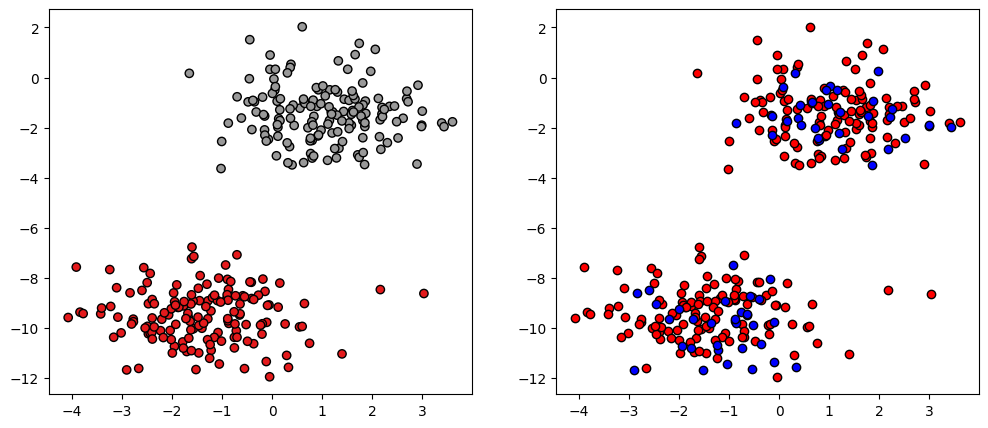

In [8]:
X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.05, random_state=2)

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.20, random_state = 2)

print(X_train.shape, X_test.shape)

_, axes = plt.subplots(1,2, figsize=(12,5))

# plot everythig
axes[0].scatter(X[:, 0], X[:, 1], c = y, edgecolors='k', cmap= "Set1")
axes[1].scatter(X_train[:, 0], X_train[:, 1], c = "r", edgecolors='k')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c = "b", edgecolors='k')

## Perceptron code

In [9]:
def activation(cond, x_1, x_2):
    return (cond * x_1) + (~(cond) * x_2)

class Perceptron():
    def __init__(self, num_features, learning_rate=0.1):
        self.num_features = num_features
        self.weights = torch.zeros( num_features, 1)
        self.bias = torch.zeros(1)
        self.learning_rate = learning_rate

    def forward(self, X ):
        linear = torch.add(torch.mm( X , self.weights ), self.bias )
        predictions = activation(linear > 0., 1, 0).float() # Step
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs=100):
        for epoch in range( epochs ):
            for i in range(y.size()[0]):
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += self.learning_rate * (errors * x[i]).view(self.num_features, 1)
                self.bias += self.learning_rate * errors

    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

In [10]:
pps = Perceptron(num_features=2, learning_rate=0.1)

X_train_tensor = torch.from_numpy( X_train ).type(torch.FloatTensor)#.to('cpu')
y_train_tensor = torch.from_numpy( y_train ).type(torch.FloatTensor)#.to('cpu')

pps.train( X_train_tensor , y_train_tensor , epochs=20)

In [ ]:
print('Model parameters:')
print('  Weights: %s' % pps.weights)
print('  Bias: %s' % pps.bias)

Model parameters:
  Weights: tensor([[0.5981],
        [0.6142]])
  Bias: tensor([3.2000])


In [ ]:
X_test_tensor = torch.from_numpy( X_test ).type(torch.FloatTensor)#.to('cpu')
y_test_tensor = torch.from_numpy( y_test ).type(torch.FloatTensor)#.to('cpu')

test_acc = pps.evaluate( X_test_tensor , y_test_tensor )
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Plot everything

In [ ]:
# Min max values for the decision bounding grid
h_min, h_max = X_test[:, 0].min() , X_test[:, 0].max()
v_min, v_max = X_test[:, 1].min() , X_test[:, 1].max()

# Create the grid
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 200), np.linspace( v_min , v_max , 200))

# Predict
to_predict = torch.from_numpy(np.c_[h_grid.ravel(), v_grid.ravel()]).type(torch.FloatTensor)#.to('cpu')
predictions = pps.forward( to_predict )
pred_grid = predictions.numpy().reshape(h_grid.shape)


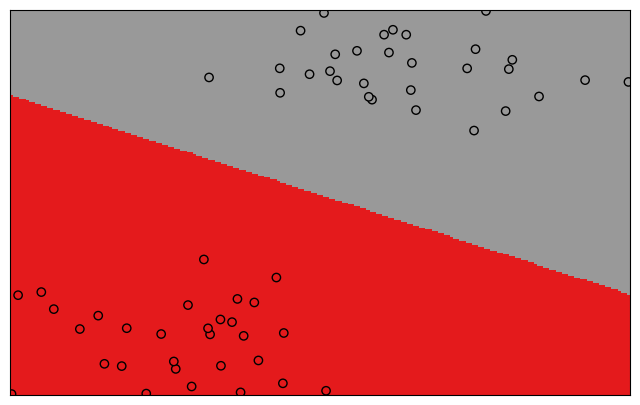

In [ ]:
# Draw everything
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = 'Set1')
#ax.contour(  _ , _ , predictions, colors=['k', 'k', 'k'], linestyles=['--', '--', '--'], levels=[0, 1, 2])

# show the scatter
ax.scatter (  X_test[:, 0] , X_test[:, 1] ,  c = y_test , edgecolors='k', cmap= 'Set1')

ax.set_xticks(())
ax.set_yticks(());